## EM Turkey ##
### relationship between currency rate - bondmarket - stockexchange ###

Turkey is right now (22/01/22) not the place to invest, but it is really interesting because a lot is happening.

I'm particularly interested in the relation between currency (Forex) and stock market. I do not have acces to detailled data, which is partly due to me pennypinching...

From september 5th (8.5) till december 19th (16.70) the Turkish Lira dropped almost half in value.
An intervention of the Turkish national bank (selling of reserves) got the Lira back up till (13).

A report from EMFI predicts an inversion of the yield curve and an inflation of (70%)!! for 2022.
"SELL" is the advice to bondowners ....

Future outlook : an inversion of the yield curve in the US is a reasonable predictor of recession.
So somewhere 2022-2023 there should be a buying opportunity.


$$\beta\Gamma$$

In [1]:
import requests     # 2.18.4
import pandas as pd # 0.23.0
import io
import datetime

In [2]:
today = datetime.datetime.now().strftime('%Y-%m-%d')
print (today)

2022-01-26


In [3]:
# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
resource = 'data'           # The resource for data queries is always'data'
flowRef ='EXR'              # Dataflow describing the data that needs to be returned, exchange rates in this case
key = 'D.TRY.EUR.SP00.A'    # Defining the dimension values, explained below

# Define the parameters
parameters = {
    'startPeriod': '2021-01-01',  # Start date of the time series
#    'endPeriod': '2021-12-29'     # End of the time series
    'endPeriod': today     # End of the time series
}

# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
request_url = entrypoint + resource + '/'+ flowRef + '/' + key

# Make the HTTP request
#response = requests.get(request_url, params=parameters)

response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
# Response succesful? (Response code 200)
print(response)

# Print the first 1000 characters to inspect the response
#response.text[0:1000]

# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

<Response [200]>


In [4]:
#df

In [5]:
# Check the DataFrame's information
#df.info()

In [6]:
# Show the last 5 entries of the DataFrame
#df.tail()

The columns we need are 'TIME_PERIOD' for the dates and 'OBS_VALUE' for the prices. Let's also do a sanity check on the prices in 'OBS_VALUE'.

In [7]:
# Inspect the prices. Do the mean, minimum and maximum make sense?
df['OBS_VALUE'].describe()

count    276.000000
mean      10.830891
std        2.189987
min        8.397500
25%        9.709275
50%       10.147600
75%       10.969675
max       20.043400
Name: OBS_VALUE, dtype: float64

In [8]:
# Create a new DataFrame called 'ts'
ts = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
# 'TIME_PERIOD' was of type 'object' (as seen in df.info). Convert it to datetime first
ts['TIME_PERIOD'] = pd.to_datetime(ts['TIME_PERIOD'])
# Set 'TIME_PERIOD' to be the index
ts = ts.set_index('TIME_PERIOD')
# Print the last 5 rows to screen
#ts.head(17)
ts.pct_change()

,OBS_VALUE
TIME_PERIOD,
2021-01-04,NaN
2021-01-05,0.001270
2021-01-06,-0.001544
2021-01-07,-0.006261
2021-01-08,0.001767
...,...
2022-01-20,-0.013702
2022-01-21,0.000894
2022-01-24,-0.004001


the spike is the FX - market is 2021-12-20 where you get	20.0434 Lira for 1 Euro.

The stockmarket came down on monday 20/12.

<AxesSubplot:xlabel='TIME_PERIOD'>

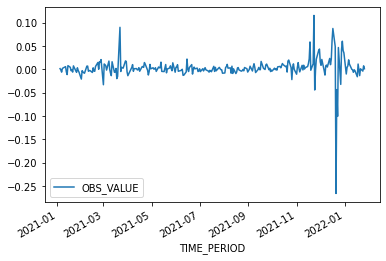

In [9]:
%matplotlib inline
ts.pct_change().plot()

OK another spike on 2021-03 .... what happened on stock exchange?


Turkish lira against EURO - data taken from ECB, you can see a spike at december 20th.
Subsequently there is an intervention from the Turkish national bank, supporting the Turkish lira : 
- statement by president Erdogan
- sell of foreign reserves

The new deposit scheme, called byBloomberg a rate increase in disguise, could be short-term gain and longterm pain, as the mechanism basically transfers FX risks from the private sector to the government, with the
latter guaranteeing depositor’s returns by covering any losses caused by a depreciation in the lira, as long as
those losses exceed the bank’s interest rates. This in eAect creates a liability for the government, which would
come back to bite in case the lira weakens again. To make matters worse, authorities might choose to monetize
the obligation, thus putting more pressure on inCation and the lira, creating a vicious cycle that could get out of

Summarizing, Turkey’s outlook includes more inflation, more long-term currency depreciation and no interest
rate hikes to correct these moves; on the contrary, it looks like the president will continue to blame everybody
and everything else but his beliefs. Brace yourself, Turkey.


Now we import data from the turkish stock exchange, we use the iShares MSCI Turkey.

In [10]:
import yfinance as yf

In [11]:
dft = yf.download("TUR",start='2021-11-01',end='2021-12-22')
#dft.info()
dft.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-08,19.860001,19.950001,19.650000,19.900000,19.808952,306300
2021-12-09,20.000000,20.100000,19.610001,19.680000,19.589960,398400
2021-12-10,19.840000,19.930000,19.690001,19.889999,19.798998,177100
2021-12-13,20.260000,20.680000,20.260000,20.480000,20.480000,461600
2021-12-14,20.350000,20.580000,20.150000,20.430000,20.430000,397400
2021-12-15,20.049999,20.309999,19.820000,20.230000,20.230000,916600
2021-12-16,19.840000,19.950001,19.670000,19.879999,19.879999,496200
2021-12-17,17.400000,17.719999,16.969999,17.110001,17.110001,2584300
2021-12-20,15.290000,21.500000,15.000000,20.740000,20.740000,8629000


**What is happening on 2021-12-17 ?** 
People selling of, are well informed, but how?

In [12]:
#guess if you want to buy Low is more informative than high ;)
dftfil=dft.filter(['Low'])

<AxesSubplot:xlabel='Date'>

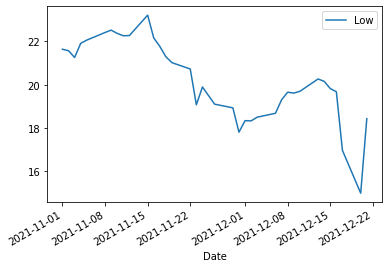

In [13]:
#%matplotlib inline
dftfil.plot()

*graph is turkish MSCI index in dollar*

[*********************100%***********************]  1 of 1 completed
                    Low
Date                   
2021-12-15  2145.600098
2021-12-16  2175.500000
2021-12-17  2071.300049
2021-12-20  1914.000000
2021-12-21  1884.699951
                   High
Date                   
2021-12-15  2195.100098
2021-12-16  2278.600098
2021-12-17  2406.899902
2021-12-20  2149.399902
2021-12-21  2103.600098


<AxesSubplot:xlabel='Date'>

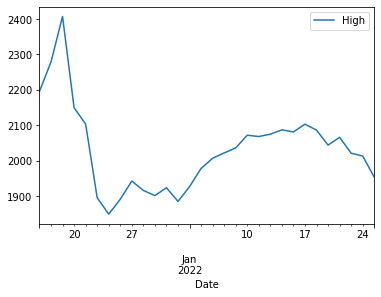

In [14]:
#istambul xu100 stock exchange price in LIRA
dftis = yf.download("XU100.IS",start='2021-12-15',end=today)
dftfilis =dftis.filter(['Low'])
print (dftfilis.head(5))
dftfilis =dftis.filter(['High'])
print (dftfilis.head(5))
dftfilis.plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

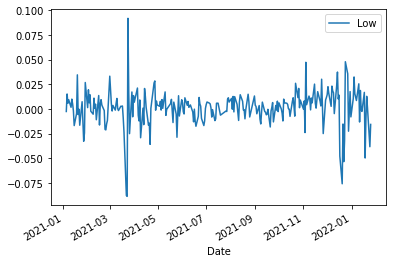

In [15]:
#istambul xu100 stock exchange price in LIRA
dftis = yf.download("XU100.IS",start='2021-01-01',end=today)
dftfilis =dftis.filter(['Low'])
dftfilis.pct_change().plot()

In [16]:
XU1001217low=2071
XU1001217high=2406
print (" daily spread of  : ",int(((XU1001217high-XU1001217low)/XU1001217high)*100), " %")

 daily spread of  :  13  %


The big question is : could the exchange-rate rise be a warning?
monday 2021-12-14	16.2092
tuesday 2021-12-15	16.5612
wednesdag 2021-12-16	17.5824



In [17]:
print (((17.5824-16.5612)/16.5612)*100)

6.1662198391420935


A currency change of 6 percent in one day? --- can I backtest this?
Seems in March same thing happened.

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

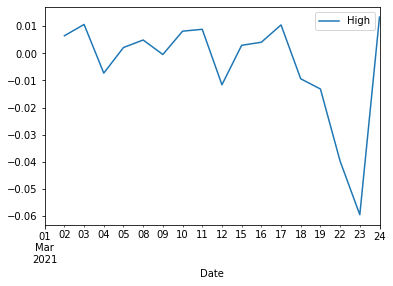

In [18]:
#istambul xu100 stock exchange price in LIRA
dftis = yf.download("XU100.IS",start='2021-03-01',end='2021-03-25')
dftfilis =dftis.filter(['High'])
dftfilis.pct_change().plot()


In [ ]:
ts.head(17)